In [1]:
%load_ext autoreload

In [2]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
BASE_PATH = os.path.join(os.getcwd(), "..", "..")
METRICS_PATH = os.path.join(BASE_PATH, "metrics")
MODULES_PATH = os.path.join(BASE_PATH, "modules")

In [4]:
sys.path.append(MODULES_PATH)

In [6]:
%autoreload 2
from active_learning import ExperimentSuitMetrics
from utils import MetricsTransformer, plot_in_steps

In [7]:
experiment_path = os.path.join(METRICS_PATH, "1_y_gal")
metrics_handler = ExperimentSuitMetrics(experiment_path)
metrics = MetricsTransformer()

In [8]:
dtypes = {
    "query_time": float,
    "eval_loss": float,
    "eval_accuracy": float,
    "eval_time": float, 
    "iteration": int,
    "labeled_pool_size": int
}

In [34]:
df_mc_dropout = metrics.load_from_dir(metrics_handler, "mc_dropout", dtype=dtypes)
df_mp = metrics.load_from_dir(metrics_handler, "moment_propagation", dtype=dtypes)

Text(940.764705882353, 0.5, 'Eval Loss')

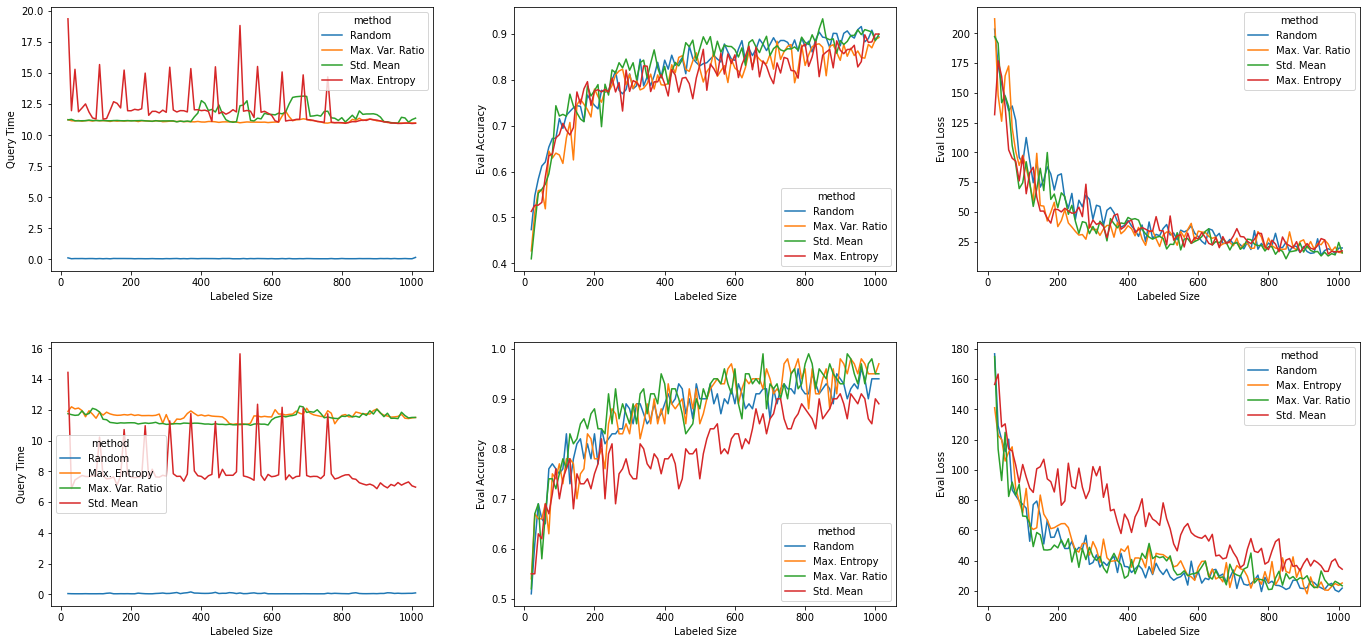

In [46]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
plt.tight_layout(pad=5)

sns.lineplot(ax=ax[0, 0], data=df_mc_dropout, y="query_time", x="labeled_pool_size", hue="method")
ax[0, 0].set_xlabel("Labeled Size")
ax[0, 0].set_ylabel("Query Time")

sns.lineplot(ax=ax[0, 1], data=df_mc_dropout, y="eval_accuracy", x="labeled_pool_size", hue="method")
ax[0, 1].set_xlabel("Labeled Size")
ax[0, 1].set_ylabel("Eval Accuracy")

sns.lineplot(ax=ax[0, 2], data=df_mc_dropout, y="eval_loss", x="labeled_pool_size", hue="method")
ax[0, 2].set_xlabel("Labeled Size")
ax[0, 2].set_ylabel("Eval Loss")

sns.lineplot(ax=ax[1, 0], data=df_mp, y="query_time", x="labeled_pool_size", hue="method")
ax[1, 0].set_xlabel("Labeled Size")
ax[1, 0].set_ylabel("Query Time")

sns.lineplot(ax=ax[1, 1], data=df_mp, y="eval_accuracy", x="labeled_pool_size", hue="method")
ax[1, 1].set_xlabel("Labeled Size")
ax[1, 1].set_ylabel("Eval Accuracy")

sns.lineplot(ax=ax[1, 2], data=df_mp, y="eval_loss", x="labeled_pool_size", hue="method")
ax[1, 2].set_xlabel("Labeled Size")
ax[1, 2].set_ylabel("Eval Loss")

In [35]:
pd.unique(df_mc_dropout.method)

array(['Random', 'Max. Var. Ratio', 'Std. Mean', 'Max. Entropy'],
      dtype=object)

In [36]:
random_selector = df_mc_dropout["method"] == "Random"
max_entropy_selector = df_mc_dropout["method"] == "Max. Entropy"

In [39]:
loss_random = MetricsTransformer.list_to_series(df_mc_dropout[random_method], "train_loss")
loss_max_entropy = MetricsTransformer.list_to_series(df_mc_dropout[max_entropy_selector], "train_loss")

In [47]:
loss_max_entropy

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1396.557861,787.533569,434.935944,459.227661,357.687866,368.665314,284.917999,282.427826,284.356171,234.147751,...,58.721020,43.511734,50.257614,50.395088,52.566086,50.133457,61.578457,59.698467,49.968472,50.582542
1,226.560211,302.200317,162.024689,70.424721,26.556084,20.229885,21.366928,19.514839,20.663383,20.207357,...,18.231890,16.762224,20.025274,19.343664,19.582388,18.618103,19.187553,18.751070,16.590052,17.830526
2,21.325586,24.671778,26.855463,15.002947,11.841201,14.043764,14.482124,12.865217,18.133984,12.175705,...,14.068297,12.800566,16.162249,15.348081,15.105803,14.769581,16.451296,14.928135,13.167811,13.358435
3,14.907877,7.220980,13.648976,11.204168,9.154734,7.526811,8.859935,9.168281,12.177547,8.607107,...,11.076356,10.298849,13.477530,12.367370,13.317053,12.541702,15.211296,12.201400,10.310076,10.937383
4,4.852682,7.038900,9.754480,5.559093,2.952513,4.434870,7.497436,5.437127,8.740926,8.848864,...,8.959608,8.903657,10.880362,10.700354,10.660916,10.213758,13.710905,9.982827,8.286940,8.474841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.009606,0.076743,0.444966,0.014451,0.013643,0.602310,0.039421,0.031064,0.129793,0.201603,...,1.060041,0.963984,0.894774,1.005173,1.010850,0.971600,1.294403,1.174151,1.120945,1.027781
96,0.039648,0.013927,0.000355,0.007932,1.059277,0.622368,0.281195,0.174061,0.023581,0.161646,...,1.473515,0.685864,1.018437,0.967251,0.987130,1.279747,1.676648,1.059515,0.835953,0.632448
97,0.004584,0.002056,0.070596,0.021866,0.086462,0.237704,0.068386,0.077975,0.094706,0.761134,...,0.800381,0.653578,0.804805,0.754499,0.939150,1.112373,1.063130,1.442055,0.895170,0.826148
98,0.000721,0.143283,0.009246,0.037937,1.195637,0.073397,0.378116,0.133056,0.081970,0.003600,...,0.845592,0.783921,1.146420,0.795536,0.867731,0.995471,1.438552,0.930970,0.858812,0.913791


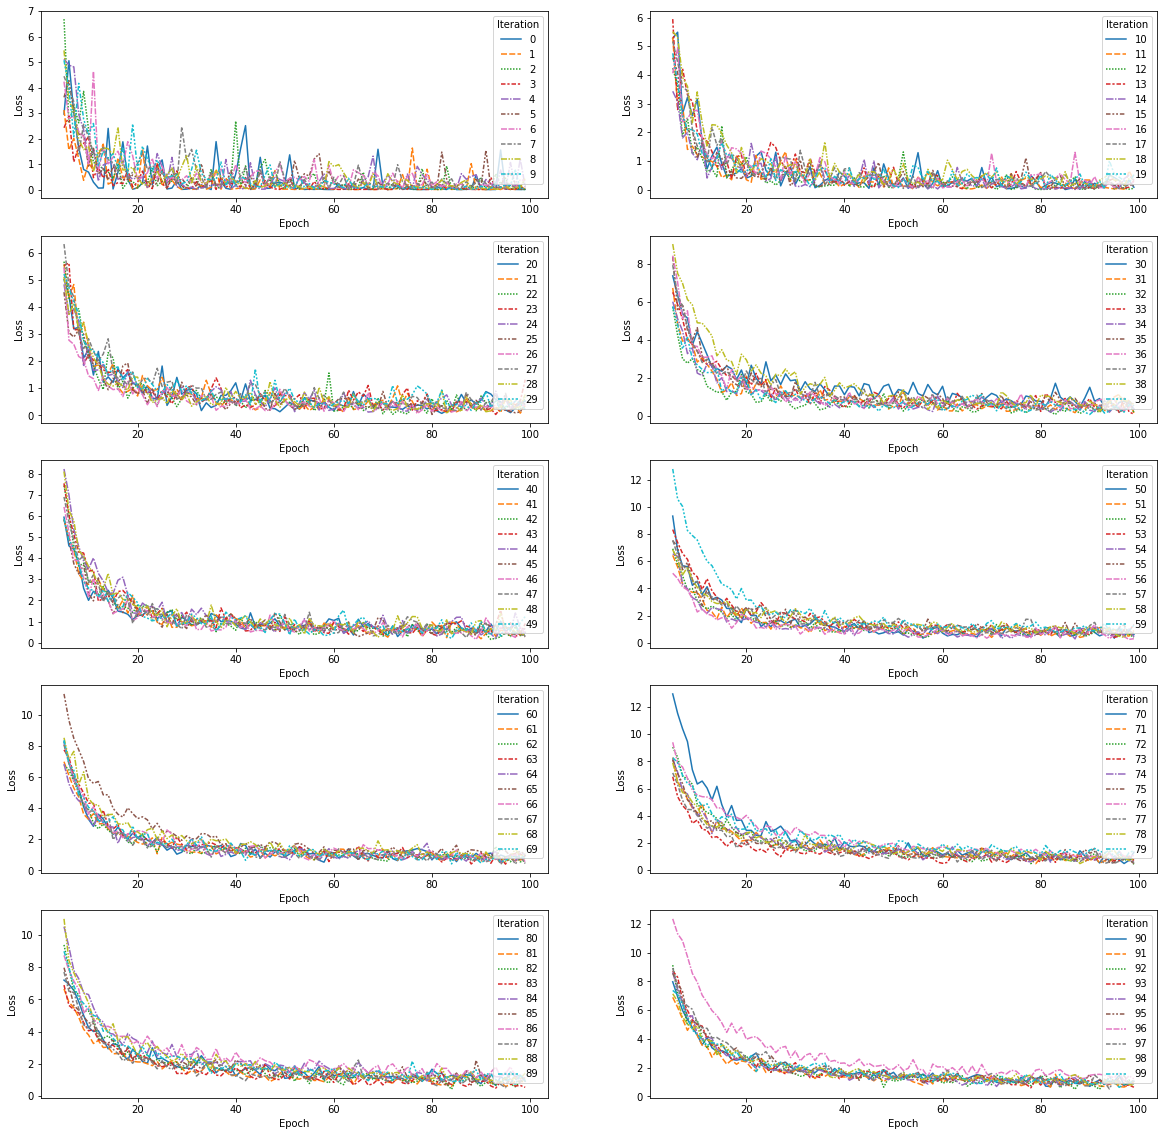

In [49]:
plot_in_steps(loss_max_entropy, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))

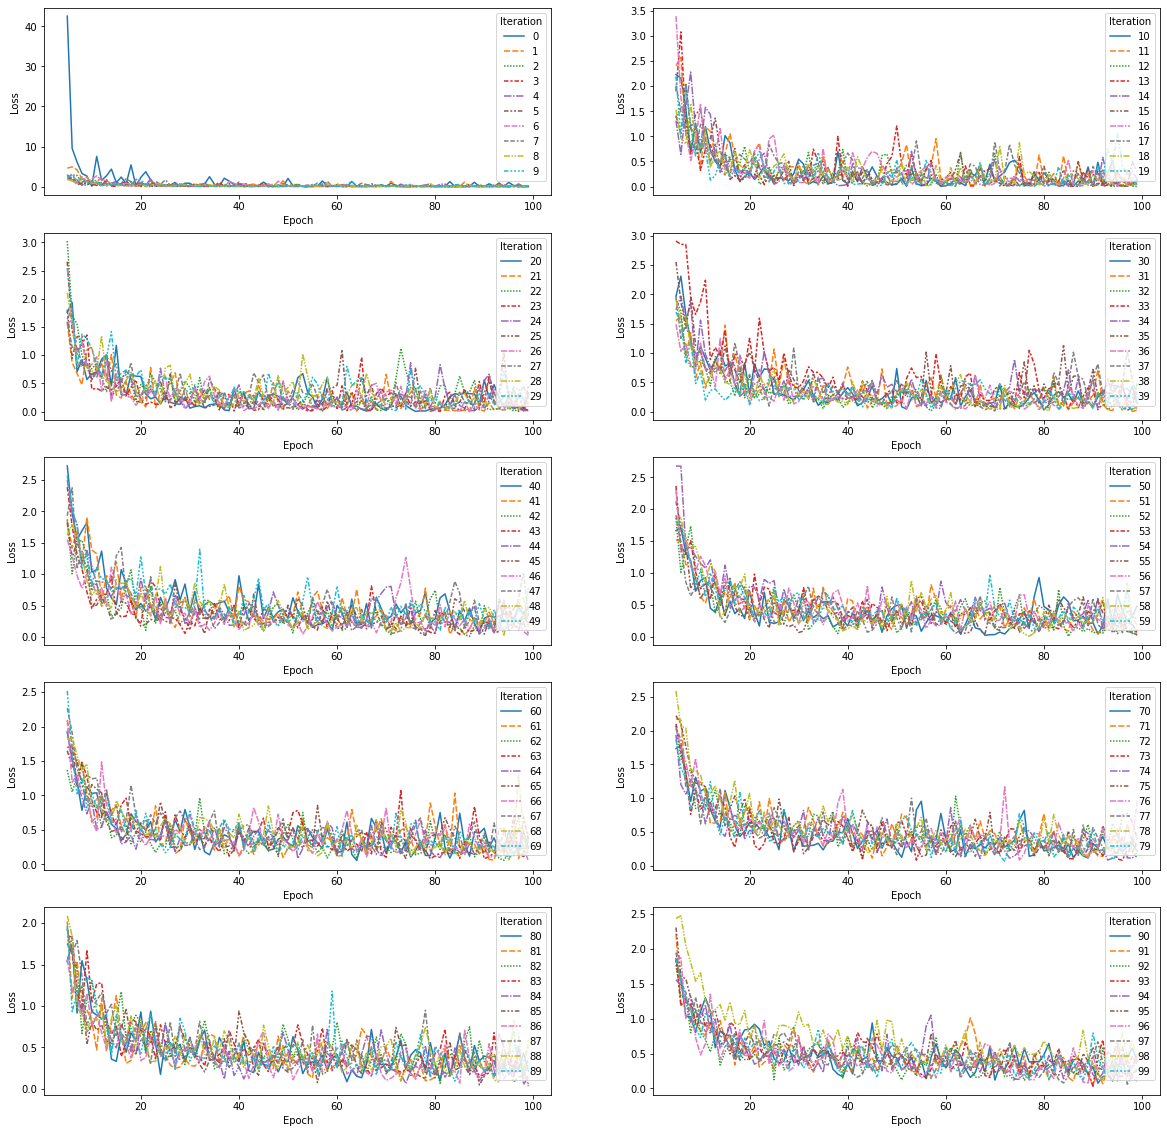

In [50]:
plot_in_steps(loss_random, 10, 10, num_columns=2, from_epoch=5, figsize=(20, 20))